
# CRISP-DM Analysis: What Happens to Stock (S&P 500) After First Rate Cut?

## 1. Business Understanding

### Objective:
Analyze the impact of the first rate cut by the Federal Reserve on the S&P 500 index to understand how it affects the stock market trends, returns, and volatility.

### Key Questions:
1. How does the S&P 500 trend after the first rate cut?
2. What are the returns of the S&P 500 at various intervals after the rate cut?
3. How does the volatility of the S&P 500 change after the rate cut?

## 2. Data Understanding

### Data Sources:
- Yahoo Finance for historical stock data.
- Federal Reserve announcements for rate cut dates.

### Data Description:
- Historical daily closing prices of the S&P 500.
- Dates of the first rate cut after a period of at least one year of stable or increasing rates.

## 3. Data Preparation

### Filtering First Rate Cut Dates:
- **Criteria**: Select the first rate cut date after at least one year of stable or increasing rates by the Fed.
- **Time Frame**: From 1989 onwards, as the Fed began publicly announcing rate decisions, making the market more transparent and efficient.

### Data Collection:
- Use `yfinance` to download historical closing prices for the S&P 500 and other global stock indices.
- Example code to download data:


## 4. Modeling

### Analyzing S&P 500 Trends:
- **Time Frame**: Analyze the trend for the next 2 years (504 trading days, 252 days/year) after each first rate cut using the 20-day moving average (MA20).
- **Steps**:
  - Calculate MA20 for the S&P 500.
  - Identify trends: Uptrend, downtrend, or sideways.
  - Compare trends across different years.

### Analyzing Returns:
- **Objective**: Calculate the returns of the S&P 500 at various intervals before and after the rate cut.
- **Time Intervals**: 
  - Before 3 months: -3 months to the rate cut date.
  - After 3, 6, 9, 12, and 24 months from the rate cut date.
- **Formula**:
  \[
  \text{Return} = \frac{\text{End Value} - \text{Start Value}}{\text{Start Value}} \times 100\%
  \]

### Analyzing Volatility:
- **Objective**: Measure the volatility of the S&P 500 before and after the rate cut.
- **Method**: Historical volatility.
- **Formula**:
  \[
  \sigma_{\text{annual}} = \sigma_{\text{daily}} \times \sqrt{252}
  \]
  Where \(\sigma_{\text{daily}}\) is the standard deviation of daily returns.

## 5. Evaluation

### Trend Analysis:
- Compare trends identified using MA20 for different periods.
- Discuss how trends vary each year and factors influencing these trends (economic, political, geopolitical).

### Return Analysis:
- Calculate and compare returns for different time intervals.
- Provide insights on how returns vary after rate cuts.

### Volatility Analysis:
- Calculate historical volatility before and after rate cuts.
- Compare the levels of volatility and discuss the implications for market stability and risk.

## 6. Deployment

### Reporting:
- Summarize findings in a comprehensive report.
- Include visualizations for trends, returns, and volatility.
- Provide actionable insights for investors and policymakers.

### Future Work:
- Extend the analysis to other global indices to understand international market responses.
- Use advanced econometric models to predict future market reactions to rate cuts.

## Appendices

### Code Snippets:
Include Python code snippets used for data download, processing, and analysis.

### References:
- Federal Reserve announcements
- Yahoo Finance for stock data
- Relevant financial and economic literature


# 2. Data Understanding

In [200]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [430]:
import yfinance as yf

# Download data of top Stock Indices from yfinance
tickers = {
    '^GSPC': 'S&P 500',
    '^DJI': 'Dow Jones',
    '^IXIC': 'NASDAQ',
    '^FTSE': 'FTSE 100',
    '^GDAXI': 'DAX',
    '^FCHI': 'CAC 40',
    '^N225': 'Nikkei 225',
    '^HSI': 'Hang Seng',
    '000001.SS': 'Shanghai Composite',
    '^BSESN': 'BSE Sensex',
    '^AXJO': 'ASX 200'
}

# Download
data = yf.download(list(tickers.keys()), start='1980-01-01', end='2024-08-01')['Adj Close']

# Rename tickers to usual name
data.rename(columns=tickers, inplace=True)

# Save to CSV
data.to_csv('stock_indices.csv')

data.tail(5)

[*********************100%%**********************]  11 of 11 completed


Ticker,Shanghai Composite,ASX 200,BSE Sensex,Dow Jones,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng,NASDAQ,Nikkei 225
Date,,,,,,,,,,,
2024-07-25,2886.741943,7861.200195,80039.796875,39935.070312,7427.020020,8186.399902,18298.720703,5399.220215,17021.910156,17181.720703,37869.511719
2024-07-26,2890.896973,7921.299805,81332.718750,40589.339844,7517.680176,8285.700195,18417.550781,5459.100098,17021.310547,17357.880859,37667.410156
2024-07-29,2891.844971,7989.600098,81355.843750,40539.929688,7443.839844,8292.400391,18320.669922,5463.540039,17238.339844,17370.199219,38468.628906
2024-07-30,2879.300049,7953.200195,81455.398438,40743.328125,7474.939941,8274.400391,18411.179688,5436.439941,17002.910156,17147.419922,38525.949219
2024-07-31,2938.749023,8092.299805,81741.343750,40842.789062,7531.490234,8368.000000,18508.650391,5522.299805,17344.599609,17599.400391,39101.820312


In [428]:
vnindex_df = pd.read_csv("vnindex_indice.csv")
# Convert 'time' column from Unix timestamp to a readable date format
vnindex_df['Date'] = pd.to_datetime(vnindex_df['time'], unit='s')
# Convert 'date' column to contain only date information
vnindex_df['Date'] = vnindex_df['Date'].dt.date
# Extract 'date' and 'close' columns
vnindex_df = vnindex_df[['Date', 'close']]
vnindex_df

,Date,close
0,2009-02-13,274.510010
1,2009-02-16,272.309998
2,2009-02-17,263.070007
3,2009-02-18,255.089996
4,2009-02-19,254.850006
...,...,...
3827,2024-07-31,1251.510000
3828,2024-08-01,1226.960000
3829,2024-08-02,1236.600000
3830,2024-08-05,1188.069900


In [429]:
from fredapi import Fred
# Download Federal Reserve announcements for rate cut dates.
# Using API from FRED
fred = Fred(api_key='a57879182496cd8c540484180210b096')

# Retrieve data (Effective Federal Funds Rate)
fed_rate = fred.get_series('FEDFUNDS')
fed_rate_df = pd.DataFrame(fed_rate, columns=['Fed Rate'])

# Retrieve Unemployment Rate
unemployment_rate = fred.get_series('UNRATE')
unemployment_rate_df = pd.DataFrame(unemployment_rate, columns=['Unemployment Rate'])

# Retrieve CPI (Consumer Price Index for All Urban Consumers: All Items in U.S. City Average)
cpi = fred.get_series('CPIAUCSL')
cpi_df = pd.DataFrame(cpi, columns=['CPI'])

# Save data to csv
fed_rate_df.to_csv('fed_rate.csv', index=True)
unemployment_rate_df.to_csv('unemployment_rate.csv', index=True)
cpi_df.to_csv('cpi.csv', index=True)

# Hiển thị một phần dữ liệu
print(fed_rate_df.head())
print(unemployment_rate_df.head())
print(cpi_df.head())

            Fed Rate
1954-07-01      0.80
1954-08-01      1.22
1954-09-01      1.07
1954-10-01      0.85
1954-11-01      0.83
            Unemployment Rate
1948-01-01                3.4
1948-02-01                3.8
1948-03-01                4.0
1948-04-01                3.9
1948-05-01                3.5
              CPI
1947-01-01  21.48
1947-02-01  21.62
1947-03-01  22.00
1947-04-01  22.00
1947-05-01  21.95


## Transform and merge dataframes

### 2.1 Fed Funds interest rate

In [451]:
fed_rate_df = pd.read_csv("fed_rate.csv")
# Đổi tên cột đầu tiên thành 'Date'
fed_rate_df.rename(columns={fed_rate_df.columns[0]: 'Date'}, inplace=True)
# Chuyển cột 'Date' thành định dạng datetime
fed_rate_df['Date'] = pd.to_datetime(fed_rate_df['Date'])
# Select data from 1988 only
fed_rate_df = fed_rate_df[fed_rate_df['Date'] >= '1988-01-01']
fed_rate_df.reset_index(drop=True, inplace=True)
fed_rate_df

,Date,Fed Rate
0,1988-01-01,6.83
1,1988-02-01,6.58
2,1988-03-01,6.58
3,1988-04-01,6.87
4,1988-05-01,7.09
...,...,...
434,2024-03-01,5.33
435,2024-04-01,5.33
436,2024-05-01,5.33
437,2024-06-01,5.33


### 2.2 SP500 

In [436]:
# 2. SP500 dataframe

indices_df = pd.read_csv("stock_indices.csv")
# extract the 'Date' and 'S&P 500' columns into sp500_close_df
sp500_close_df = indices_df[['Date', 'S&P 500']].copy()
# Rename 'S&P 500' to 'Close'
sp500_close_df.rename(columns={'S&P 500': 'Close'}, inplace=True)

sp500_close_df

,Date,Close
0,1980-01-02,105.760002
1,1980-01-03,105.220001
2,1980-01-04,106.519997
3,1980-01-07,106.809998
4,1980-01-08,108.949997
...,...,...
11598,2024-07-25,5399.220215
11599,2024-07-26,5459.100098
11600,2024-07-29,5463.540039
11601,2024-07-30,5436.439941


## 3. Data Preparation

### Filtering First Rate Cut Dates:
- **Criteria**: Select the first rate cut date after at least one year of stable or increasing rates by the Fed.
- **Time Frame**: From 1989 onwards, as the Fed began publicly announcing rate decisions, making the market more transparent and efficient.

In [534]:
def find_first_rate_cut(df):
    """
    This function identifies the first rate cut after at least 12 months
    of either rate increases or stable rates, without any decreases.
    """
    df = df.copy()  # Copy df and no-changes original df
    df['Rate Change'] = df['Fed Rate'].diff()

    # Reset the index to ensure continuous indexing
    df.reset_index(drop=True, inplace=True)

    first_cut = []
    increasing_or_stable_period = 0

    for i in range(1, len(df)):
        if df.loc[i, 'Rate Change'] >= 0:
            increasing_or_stable_period += 1
        else:
            if increasing_or_stable_period >= 6:
                first_cut.append(df.loc[i])
            increasing_or_stable_period = 0  # Reset the count after a cut

    return pd.DataFrame(first_cut).drop(columns=['Rate Change'])

# Apply the re-corrected function to the fed_rate_df
first_rate_cut_df = find_first_rate_cut(fed_rate_df)


# Display the corrected dataframe
first_rate_cut_df.reset_index(inplace=True, drop=True)
first_rate_cut_df

,Date,Fed Rate
0,1989-04-01,9.84
1,1995-05-01,6.01
2,2000-08-01,6.50
3,2006-12-01,5.24
4,2012-08-01,0.13
5,2015-10-01,0.12
6,2017-09-01,1.15
7,2019-05-01,2.39


In [455]:
# Fed Rate Over Time with First Rate Cut highlight
fig.add_scatter(
    x=np.array(pd.to_datetime(first_rate_cut_df['Date'])),
    y=first_rate_cut_df['Fed Rate'],
    mode='markers',
    marker=dict(color='red', size=10),
    name='First Rate Cut'
)
fig.show()


# Trend Analysis

In [465]:
first_rate_cut_df

,Date,Fed Rate
15,1989-04-01,9.84
88,1995-05-01,6.01
151,2000-08-01,6.50
227,2006-12-01,5.24
295,2012-08-01,0.13
333,2015-10-01,0.12
356,2017-09-01,1.15
376,2019-05-01,2.39


/var/folders/6q/33ssnk0j73sg90b2sbyf6_740000gn/T/ipykernel_85619/34093370.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



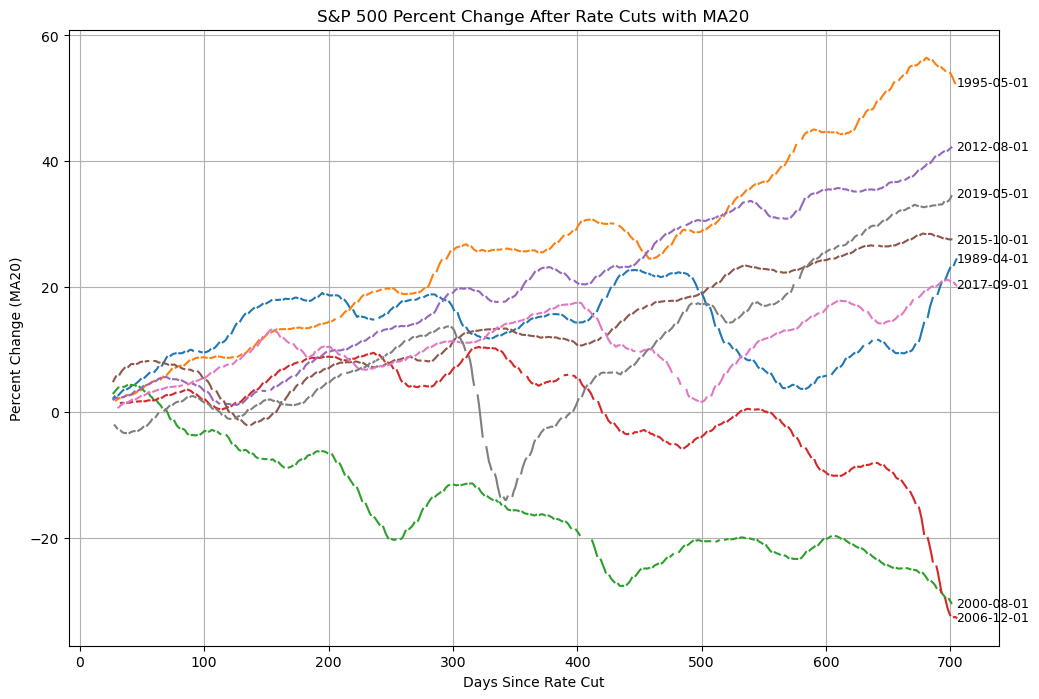

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa các ngày cắt giảm lãi suất đầu tiên
rate_cut_dates = first_rate_cut_df['Date']

# Đảm bảo cột 'Date' là kiểu datetime
sp500_close_df['Date'] = pd.to_datetime(sp500_close_df['Date'])

# Hàm tìm ngày gần nhất
def find_closest_date(df, target_date):
    return df.iloc[(df['Date'] - target_date).abs().argsort()[:1]]

# Chuẩn bị dữ liệu
trading_days_per_year = 252  # Số ngày giao dịch trong một năm
time_period_days = 2.8 * trading_days_per_year  # 3 năm giao dịch
time_series_dict = {}

# Thu thập dữ liệu time series cho từng ngày cắt giảm lãi suất
for rate_cut_date in rate_cut_dates:
    closest_rate_cut_date = find_closest_date(sp500_close_df, rate_cut_date)['Date'].values[0]
    initial_close = sp500_close_df.loc[sp500_close_df['Date'] == closest_rate_cut_date, 'Close'].values[0]

    # Lấy dữ liệu time series từ ngày cắt giảm lãi suất đến 2 năm sau đó
    end_date = closest_rate_cut_date + pd.DateOffset(days=time_period_days)
    time_series = sp500_close_df[(sp500_close_df['Date'] >= closest_rate_cut_date) & (sp500_close_df['Date'] <= end_date)].copy()
    time_series.reset_index(drop=True, inplace=True)
    time_series['Days Since Rate Cut'] = (time_series['Date'] - closest_rate_cut_date).dt.days
    time_series['Percent Change'] = (time_series['Close'] - initial_close) / initial_close * 100
    time_series['MA20'] = time_series['Percent Change'].rolling(window=20).mean()
    time_series_dict[str(rate_cut_date.date())] = time_series.set_index('Days Since Rate Cut')['MA20']

# Chuyển đổi dictionary thành DataFrame
time_series_df = pd.DataFrame(time_series_dict)

# Vẽ biểu đồ time series
plt.figure(figsize=(12, 8))
for column in time_series_df.columns:
    plt.plot(time_series_df.index, time_series_df[column], label=column)
    plt.text(time_series_df.index[-1], time_series_df[column].dropna().iloc[-1], column, fontsize=9, verticalalignment='center')

plt.title('S&P 500 Percent Change After Rate Cuts with MA20')
plt.xlabel('Days Since Rate Cut')
plt.ylabel('Percent Change (MA20)')
plt.grid(True)
plt.show()


# REturn

  Date of First Cut  Previous 3 Months  Next 3 Months  Next 6 Months  \
0        1989-04-01           7.104717       7.284320      17.800863   
1        1995-05-01           9.419649       8.824331      13.604006   
2        2000-08-01          -2.548615      -1.173771      -4.494125   
3        2006-12-01           6.835950       0.462521       9.997065   
4        2012-08-01          -1.885021       3.800572      10.023129   
5        2015-10-01          -7.576219       6.243827       7.742933   
6        2017-09-01           1.711474       6.689545       8.120969   
7        2019-05-01           8.841581       1.020275       4.897167   

   Next 12 Months  
0       14.693473  
1       27.285810  
2      -15.448851  
3        6.044924  
4       24.107121  
5       12.706494  
6       17.159757  
7       -3.181553  
                  count                 mean                  min  \
Date of First Cut     8  2007-03-05 21:00:00  1989-04-01 00:00:00   
Previous 3 Months   8.0          

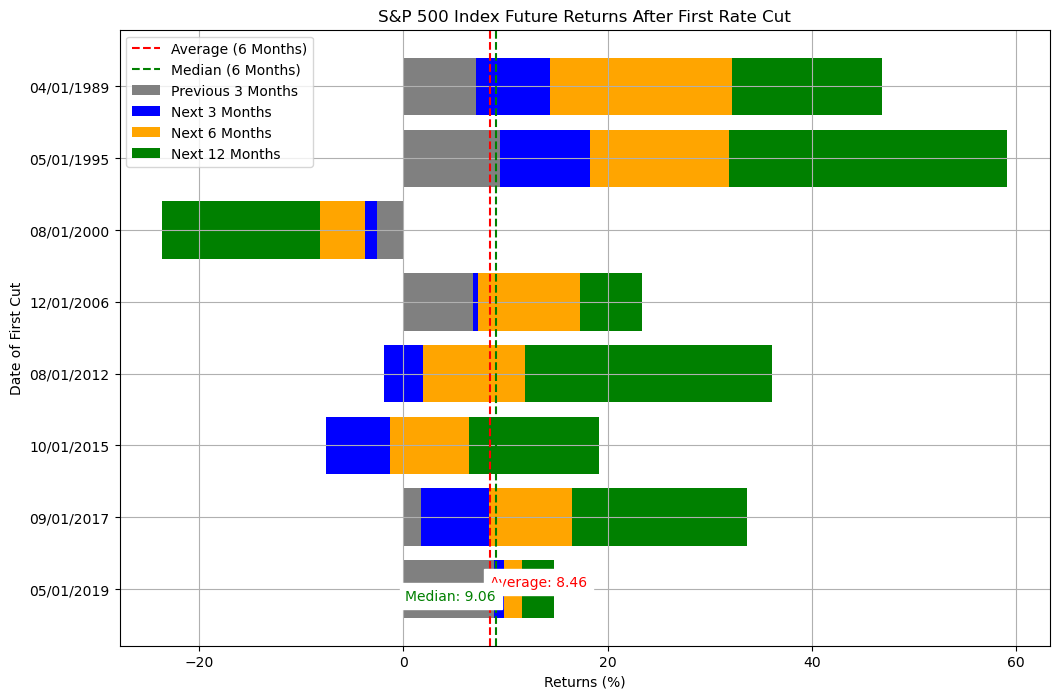

In [474]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_returns(rate_cut_dates, sp500_data, periods=[3, 6, 12]):
    results = []

    for cut_date in rate_cut_dates['Date']:
        data = {'Date of First Cut': cut_date}

        # Tính toán tỷ suất lợi nhuận cho 3 tháng trước ngày cắt giảm lãi suất
        start_date_prev = cut_date - pd.DateOffset(months=3)
        sp500_period_prev = sp500_data[(sp500_data['Date'] >= start_date_prev) & (sp500_data['Date'] < cut_date)]

        if not sp500_period_prev.empty:
            initial_price_prev = sp500_period_prev.iloc[0]['Close']
            final_price_prev = sp500_period_prev.iloc[-1]['Close']
            return_percentage_prev = (final_price_prev - initial_price_prev) / initial_price_prev * 100
            data['Previous 3 Months'] = return_percentage_prev
        else:
            data['Previous 3 Months'] = None

        for period in periods:
            end_date = cut_date + pd.DateOffset(months=period)
            sp500_period = sp500_data[(sp500_data['Date'] >= cut_date) & (sp500_data['Date'] <= end_date)]

            if not sp500_period.empty:
                initial_price = sp500_period.iloc[0]['Close']
                final_price = sp500_period.iloc[-1]['Close']
                return_percentage = (final_price - initial_price) / initial_price * 100
                data[f'Next {period} Months'] = return_percentage
            else:
                data[f'Next {period} Months'] = None

        results.append(data)

    return pd.DataFrame(results)

# Thực hiện tính toán
returns_df = calculate_returns(first_rate_cut_df, sp500_close_df)

# Tính toán các giá trị trung bình, trung vị, và tỷ lệ dương
summary_stats = returns_df.describe().T
summary_stats['% Positive'] = (returns_df.drop(columns='Date of First Cut') > 0).mean() * 100

# Hiển thị kết quả
print(returns_df)
print(summary_stats)

# Tạo biểu đồ dạng chồng
fig, ax = plt.subplots(figsize=(12, 8))

# Đảo ngược thứ tự để các thanh chồng lên nhau từ dưới lên
returns_df = returns_df[::-1]

# Chồng các dữ liệu cột lên nhau theo các tháng
ax.barh(returns_df['Date of First Cut'].dt.strftime('%m/%d/%Y'), returns_df['Previous 3 Months'], label='Previous 3 Months', color='gray')
ax.barh(returns_df['Date of First Cut'].dt.strftime('%m/%d/%Y'), returns_df['Next 3 Months'], label='Next 3 Months', color='blue', left=returns_df['Previous 3 Months'])
ax.barh(returns_df['Date of First Cut'].dt.strftime('%m/%d/%Y'), returns_df['Next 6 Months'], label='Next 6 Months', color='orange', left=returns_df['Previous 3 Months'] + returns_df['Next 3 Months'])
ax.barh(returns_df['Date of First Cut'].dt.strftime('%m/%d/%Y'), returns_df['Next 12 Months'], label='Next 12 Months', color='green', left=returns_df['Previous 3 Months'] + returns_df['Next 3 Months'] + returns_df['Next 6 Months'])

# Vẽ đường trung bình và trung vị cho 3 tháng sau ngày cắt giảm lãi suất
avg_6_months = summary_stats.loc['Next 6 Months', 'mean']
median_6_months = summary_stats.loc['Next 6 Months', '50%']

ax.axvline(avg_6_months, color='r', linestyle='--', label='Average (6 Months)')
ax.axvline(median_6_months, color='g', linestyle='--', label='Median (6 Months)')

# Hiển thị giá trị trung bình và trung vị trên biểu đồ
ax.text(avg_6_months, 0, f'Average: {avg_6_months:.2f}', color='r', va='bottom', ha='left', backgroundcolor='w')
ax.text(median_6_months, 0, f'Median: {median_6_months:.2f}', color='g', va='top', ha='right', backgroundcolor='w')

ax.legend()
ax.set_title('S&P 500 Index Future Returns After First Rate Cut')
ax.set_xlabel('Returns (%)')
ax.set_ylabel('Date of First Cut')
plt.grid(True)
plt.show()


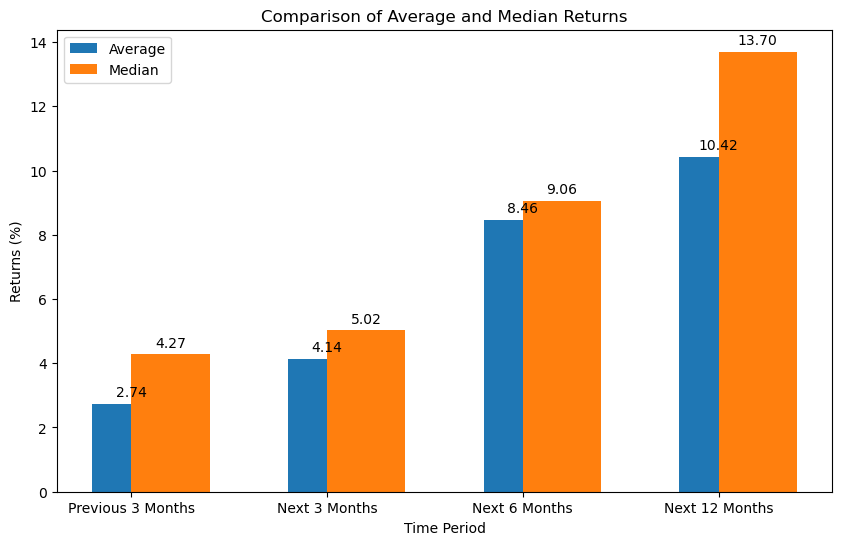

In [475]:
# Perform calculations
returns_df = calculate_returns(first_rate_cut_df, sp500_close_df)

# Check if columns exist in DataFrame
columns_to_check = ['Previous 3 Months', 'Next 3 Months', 'Next 6 Months', 'Next 12 Months']
for col in columns_to_check:
    if col not in returns_df.columns:
        returns_df[col] = None

# Calculate summary statistics
summary_stats = returns_df.describe().T

avg_prev_3_months = summary_stats.loc['Previous 3 Months', 'mean'] if 'Previous 3 Months' in summary_stats.index else 0
median_prev_3_months = summary_stats.loc['Previous 3 Months', '50%'] if 'Previous 3 Months' in summary_stats.index else 0

avg_3_months = summary_stats.loc['Next 3 Months', 'mean'] if 'Next 3 Months' in summary_stats.index else 0
median_3_months = summary_stats.loc['Next 3 Months', '50%'] if 'Next 3 Months' in summary_stats.index else 0

avg_6_months = summary_stats.loc['Next 6 Months', 'mean'] if 'Next 6 Months' in summary_stats.index else 0
median_6_months = summary_stats.loc['Next 6 Months', '50%'] if 'Next 6 Months' in summary_stats.index else 0

avg_12_months = summary_stats.loc['Next 12 Months', 'mean'] if 'Next 12 Months' in summary_stats.index else 0
median_12_months = summary_stats.loc['Next 12 Months', '50%'] if 'Next 12 Months' in summary_stats.index else 0

# Prepare data for stacked bar chart
averages = [avg_prev_3_months, avg_3_months, avg_6_months, avg_12_months]
medians = [median_prev_3_months, median_3_months, median_6_months, median_12_months]
labels = ['Previous 3 Months', 'Next 3 Months', 'Next 6 Months', 'Next 12 Months']

# Plot stacked bar chart with value annotations
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(labels))

bar1 = ax.bar(x, averages, width=0.4, label='Average', align='center')
bar2 = ax.bar(x, medians, width=0.4, label='Median', align='edge')

# Add value annotations
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Time Period')
ax.set_ylabel('Returns (%)')
ax.set_title('Comparison of Average and Median Returns')
ax.legend()

plt.show()


  Date of First Cut  Previous 3 Months Volatility  Next 3 Months Volatility  \
0        1989-04-01                     11.744581                 11.643543   
1        1995-05-01                      6.744722                  9.751356   
2        2000-08-01                     19.611355                 17.927057   
3        2006-12-01                      7.753544                 10.050144   
4        2012-08-01                     16.183074                 10.619764   
5        2015-10-01                     21.122271                 14.944927   
6        2017-09-01                      7.490080                  5.559861   
7        2019-05-01                      8.984178                 11.870433   

   Next 6 Months Volatility  Next 12 Months Volatility  \
0                 11.121358                  13.754934   
1                  8.229283                  10.021370   
2                 20.769307                  21.379026   
3                 10.285195                  15.403175  

/var/folders/6q/33ssnk0j73sg90b2sbyf6_740000gn/T/ipykernel_85619/669204039.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



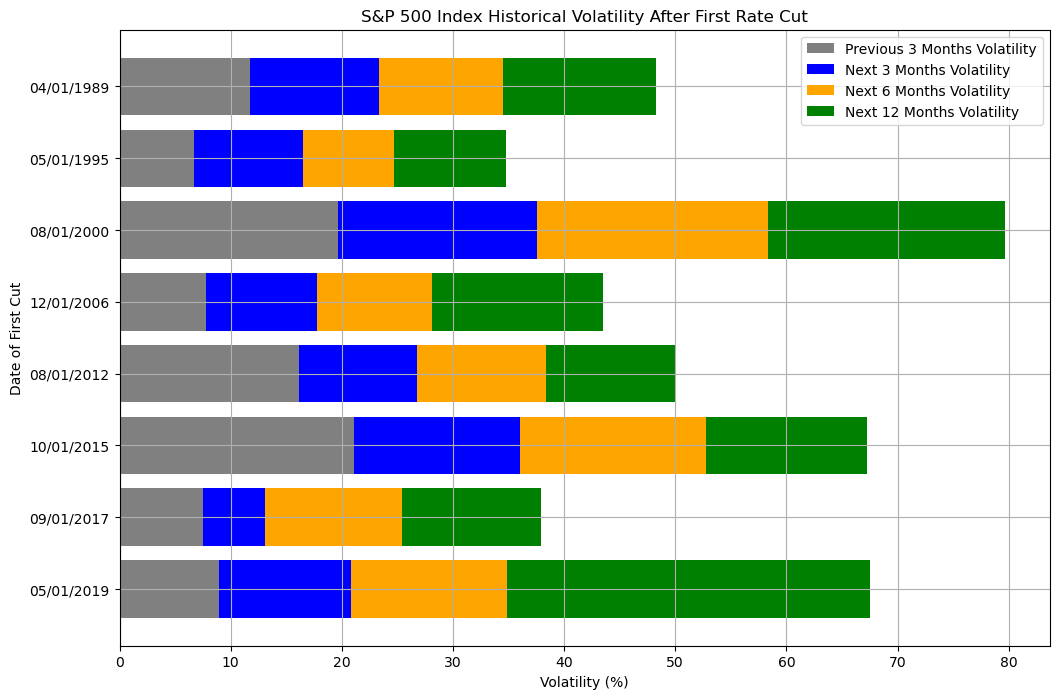

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def calculate_volatility(rate_cut_dates, sp500_data, periods=[3, 6, 12, 24]):
    results = []

    for cut_date in rate_cut_dates['Date']:
        data = {'Date of First Cut': cut_date}

        # Tính toán volatility cho 3 tháng trước ngày cắt giảm lãi suất
        start_date_prev = cut_date - pd.DateOffset(months=3)
        sp500_period_prev = sp500_data[(sp500_data['Date'] >= start_date_prev) & (sp500_data['Date'] < cut_date)]

        if not sp500_period_prev.empty:
            log_returns_prev = np.log(sp500_period_prev['Close'] / sp500_period_prev['Close'].shift(1)).dropna()
            volatility_prev = log_returns_prev.std() * np.sqrt(252) * 100  # Annualize volatility
            data['Previous 3 Months Volatility'] = volatility_prev
        else:
            data['Previous 3 Months Volatility'] = None

        for period in periods:
            end_date = cut_date + pd.DateOffset(months=period)
            sp500_period = sp500_data[(sp500_data['Date'] >= cut_date) & (sp500_data['Date'] <= end_date)]

            if not sp500_period.empty:
                log_returns = np.log(sp500_period['Close'] / sp500_period['Close'].shift(1)).dropna()
                volatility = log_returns.std() * np.sqrt(252) * 100  # Annualize volatility
                data[f'Next {period} Months Volatility'] = volatility
            else:
                data[f'Next {period} Months Volatility'] = None

        results.append(data)

    return pd.DataFrame(results)

# Ensure 'Date' column is datetime type
first_rate_cuts_df['Date'] = pd.to_datetime(first_rate_cuts_df['Date'])
sp500_close_df['Date'] = pd.to_datetime(sp500_close_df['Date'])

# Perform calculations
returns_df = calculate_returns(first_rate_cut_df, sp500_close_df)
volatility_df = calculate_volatility(first_rate_cut_df, sp500_close_df)

# Display results

print(volatility_df)


# Plot Volatility
fig, ax = plt.subplots(figsize=(12, 8))

# Reverse the order so bars stack from bottom to top
volatility_df = volatility_df[::-1]

# Stack column data by months
ax.barh(volatility_df['Date of First Cut'].dt.strftime('%m/%d/%Y'), volatility_df['Previous 3 Months Volatility'], label='Previous 3 Months Volatility', color='gray')
ax.barh(volatility_df['Date of First Cut'].dt.strftime('%m/%d/%Y'), volatility_df['Next 3 Months Volatility'], label='Next 3 Months Volatility', color='blue', left=volatility_df['Previous 3 Months Volatility'])
ax.barh(volatility_df['Date of First Cut'].dt.strftime('%m/%d/%Y'), volatility_df['Next 6 Months Volatility'], label='Next 6 Months Volatility', color='orange', left=volatility_df['Previous 3 Months Volatility'] + volatility_df['Next 3 Months Volatility'])
ax.barh(volatility_df['Date of First Cut'].dt.strftime('%m/%d/%Y'), volatility_df['Next 12 Months Volatility'], label='Next 12 Months Volatility', color='green', left=volatility_df['Previous 3 Months Volatility'] + volatility_df['Next 3 Months Volatility'] + volatility_df['Next 6 Months Volatility'])

ax.legend()
ax.set_title('S&P 500 Index Historical Volatility After First Rate Cut')
ax.set_xlabel('Volatility (%)')
ax.set_ylabel('Date of First Cut')
plt.grid(True)
plt.show()


In [483]:
volatility_df

,Date of First Cut,Previous 3 Months Volatility,Next 3 Months Volatility,Next 6 Months Volatility,Next 12 Months Volatility,Next 24 Months Volatility
7,2019-05-01,8.984178,11.870433,14.040732,32.608640,26.294837
6,2017-09-01,7.490080,5.559861,12.403587,12.505538,14.704505
5,2015-10-01,21.122271,14.944927,16.704459,14.461976,11.493289
4,2012-08-01,16.183074,10.619764,11.524674,11.765000,11.097209
3,2006-12-01,7.753544,10.050144,10.285195,15.403175,30.303682
2,2000-08-01,19.611355,17.927057,20.769307,21.379026,21.887155
1,1995-05-01,6.744722,9.751356,8.229283,10.021370,11.485738
0,1989-04-01,11.744581,11.643543,11.121358,13.754934,15.245415


In [484]:
# Function to apply color scale with 'coolwarm' colormap and formatted numbers
def color_scale(val, max_val):
    color = plt.cm.coolwarm(val / max_val)
    r, g, b, a = int(color[0]*255), int(color[1]*255), int(color[2]*255), color[3]
    return f'background-color: rgba({r}, {g}, {b}, {a}); color: {"black" if (r*0.299 + g*0.587 + b*0.114) > 186 else "white"}'

# Find the maximum value for scaling
max_val = volatility_df.iloc[:, 1:].max().max()

# Apply color scale to the DataFrame
styled_volatility_df = volatility_df.style.applymap(lambda val: color_scale(val, max_val), subset=pd.IndexSlice[:, 'Previous 3 Months Volatility':'Next 24 Months Volatility'])

# Format numbers to two decimal places
styled_volatility_df = styled_volatility_df.format(precision=2)

# Display the styled DataFrame
styled_volatility_df

/var/folders/6q/33ssnk0j73sg90b2sbyf6_740000gn/T/ipykernel_85619/2357543802.py:11: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Date of First Cut,Previous 3 Months Volatility,Next 3 Months Volatility,Next 6 Months Volatility,Next 12 Months Volatility,Next 24 Months Volatility
7,2019-05-01 00:00:00,8.98,11.87,14.04,32.61,26.29
6,2017-09-01 00:00:00,7.49,5.56,12.40,12.51,14.70
5,2015-10-01 00:00:00,21.12,14.94,16.70,14.46,11.49
4,2012-08-01 00:00:00,16.18,10.62,11.52,11.76,11.10
3,2006-12-01 00:00:00,7.75,10.05,10.29,15.40,30.30
2,2000-08-01 00:00:00,19.61,17.93,20.77,21.38,21.89
1,1995-05-01 00:00:00,6.74,9.75,8.23,10.02,11.49
0,1989-04-01 00:00:00,11.74,11.64,11.12,13.75,15.25


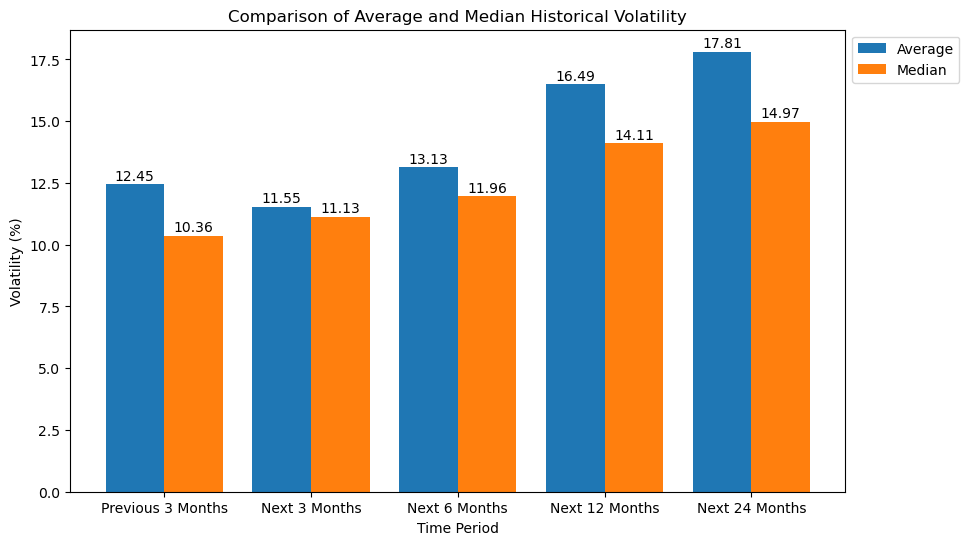

In [488]:
# Perform calculations
volatility_df = calculate_volatility(first_rate_cut_df, sp500_close_df)

# Tính toán giá trị trung bình và trung vị
volatility_df['Date of First Cut'] = pd.to_datetime(volatility_df['Date of First Cut'])

avg_volatility = volatility_df.mean()
median_volatility = volatility_df.median()

# Loại bỏ cột 'Date of First Cut' khỏi kết quả tính toán
avg_volatility = avg_volatility.drop('Date of First Cut')
median_volatility = median_volatility.drop('Date of First Cut')

# Tạo biểu đồ so sánh
labels = ['Previous 3 Months', 'Next 3 Months', 'Next 6 Months', 'Next 12 Months', 'Next 24 Months']
averages = avg_volatility.values
medians = median_volatility.values

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(labels))

bar1 = ax.bar(x - 0.2, averages, width=0.4, label='Average', align='center')
bar2 = ax.bar(x + 0.2, medians, width=0.4, label='Median', align='center')

# Thêm chú thích cho các cột
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='baseline')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='baseline')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Time Period')
ax.set_ylabel('Volatility (%)')
ax.set_title('Comparison of Average and Median Historical Volatility')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()




In [489]:
volatility_df

,Date of First Cut,Previous 3 Months Volatility,Next 3 Months Volatility,Next 6 Months Volatility,Next 12 Months Volatility,Next 24 Months Volatility
0,1989-04-01,11.744581,11.643543,11.121358,13.754934,15.245415
1,1995-05-01,6.744722,9.751356,8.229283,10.021370,11.485738
2,2000-08-01,19.611355,17.927057,20.769307,21.379026,21.887155
3,2006-12-01,7.753544,10.050144,10.285195,15.403175,30.303682
4,2012-08-01,16.183074,10.619764,11.524674,11.765000,11.097209
5,2015-10-01,21.122271,14.944927,16.704459,14.461976,11.493289
6,2017-09-01,7.490080,5.559861,12.403587,12.505538,14.704505
7,2019-05-01,8.984178,11.870433,14.040732,32.608640,26.294837


# Correction

In [506]:
# Convert the 'Date' column in df_stock_indices to datetime format and extract only the date
indices_df['Date'] = pd.to_datetime(indices_df['Date']).dt.date

# Merge the two DataFrames on the date columns
merged_df = pd.merge(indices_df, vnindex_df, left_on='Date', right_on='Date', how='left')

# Drop the redundant 'date' column
merged_df.drop(columns=['Date'], inplace=True)

# Show the first few rows of the merged DataFrame
merged_df.head()


,Shanghai Composite,ASX 200,BSE Sensex,Dow Jones,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng,NASDAQ,Nikkei 225,close
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.760002,NaN,148.169998,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.220001,NaN,145.970001,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.519997,NaN,148.020004,6560.160156,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.809998,NaN,148.619995,6552.649902,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.949997,NaN,150.679993,6563.279785,NaN


In [501]:
vnindex_df


,Date,close
0,2009-02-13,274.510010
1,2009-02-16,272.309998
2,2009-02-17,263.070007
3,2009-02-18,255.089996
4,2009-02-19,254.850006
...,...,...
3827,2024-07-31,1251.510000
3828,2024-08-01,1226.960000
3829,2024-08-02,1236.600000
3830,2024-08-05,1188.069900


In [507]:
# Rename the 'close' column to 'VN Index'
merged_df.rename(columns={'close': 'VN Index'}, inplace=True)

# Drop rows with any null values
cleaned_df = merged_df.dropna()

cleaned_df

,Shanghai Composite,ASX 200,BSE Sensex,Dow Jones,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng,NASDAQ,Nikkei 225,VN Index
7576,2320.791992,3559.100098,9634.740234,7850.410156,2997.860107,4189.600098,4413.390137,826.840027,13554.669922,1534.359985,7779.399902,274.510010
7578,2319.440918,3464.300049,9035.000000,7552.600098,2875.229980,4034.100098,4216.600098,789.169983,12945.400391,1470.660034,7645.509766,263.070007
7579,2209.862061,3413.199951,9015.179688,7555.629883,2874.070068,4006.800049,4204.959961,788.419983,13016.000000,1467.969971,7534.439941,255.089996
7580,2227.125000,3448.899902,9042.629883,7465.950195,2872.600098,4018.399902,4215.209961,778.940002,13023.360352,1442.819946,7557.649902,254.850006
7581,2261.478027,3402.399902,8843.209961,7365.669922,2750.550049,3889.100098,4014.659912,770.049988,12699.169922,1441.229980,7416.379883,252.570007
...,...,...,...,...,...,...,...,...,...,...,...,...
11598,2886.741943,7861.200195,80039.796875,39935.070312,7427.020020,8186.399902,18298.720703,5399.220215,17021.910156,17181.720703,37869.511719,1233.189900
11599,2890.896973,7921.299805,81332.718750,40589.339844,7517.680176,8285.700195,18417.550781,5459.100098,17021.310547,17357.880859,37667.410156,1242.110000
11600,2891.844971,7989.600098,81355.843750,40539.929688,7443.839844,8292.400391,18320.669922,5463.540039,17238.339844,17370.199219,38468.628906,1246.600000
11601,2879.300049,7953.200195,81455.398438,40743.328125,7474.939941,8274.400391,18411.179688,5436.439941,17002.910156,17147.419922,38525.949219,1245.060100


In [508]:
correlation_matrix = cleaned_df.corr()

In [516]:
correlation_matrix

,Shanghai Composite,ASX 200,BSE Sensex,Dow Jones,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng,NASDAQ,Nikkei 225,VN Index
Shanghai Composite,1.000000,0.502324,0.450944,0.468101,0.526455,0.357298,0.534323,0.469909,0.351444,0.478948,0.525839,0.513566
ASX 200,0.502324,1.000000,0.944675,0.969470,0.970403,0.858372,0.962779,0.961678,0.225033,0.937808,0.953150,0.931343
BSE Sensex,0.450944,0.944675,1.000000,0.967519,0.966044,0.753432,0.927361,0.980264,-0.021051,0.965732,0.960891,0.910455
Dow Jones,0.468101,0.969470,0.967519,1.000000,0.957144,0.802991,0.964762,0.992532,0.165037,0.979391,0.969239,0.952584
CAC 40,0.526455,0.970403,0.966044,0.957144,1.000000,0.837064,0.963760,0.960187,0.105411,0.933813,0.965761,0.908760
FTSE 100,0.357298,0.858372,0.753432,0.802991,0.837064,1.000000,0.875809,0.770464,0.370186,0.703509,0.801671,0.742641
DAX,0.534323,0.962779,0.927361,0.964762,0.963760,0.875809,1.000000,0.958389,0.239096,0.932993,0.972819,0.898680
S&P 500,0.469909,0.961678,0.980264,0.992532,0.960187,0.770464,0.958389,1.000000,0.086804,0.992234,0.973689,0.942792
Hang Seng,0.351444,0.225033,-0.021051,0.165037,0.105411,0.370186,0.239096,0.086804,1.000000,0.084521,0.124310,0.260195
NASDAQ,0.478948,0.937808,0.965732,0.979391,0.933813,0.703509,0.932993,0.992234,0.084521,1.000000,0.956959,0.939545


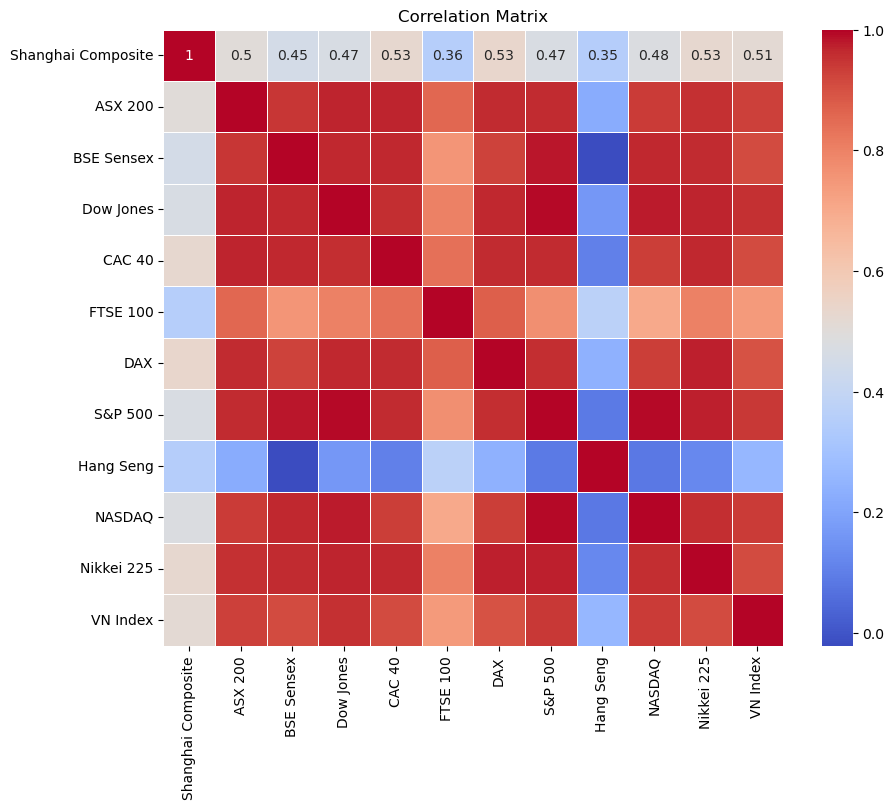

In [530]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))  # Tăng kích thước của biểu đồ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 10})  # Giảm kích thước font chữ
plt.title('Correlation Matrix')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



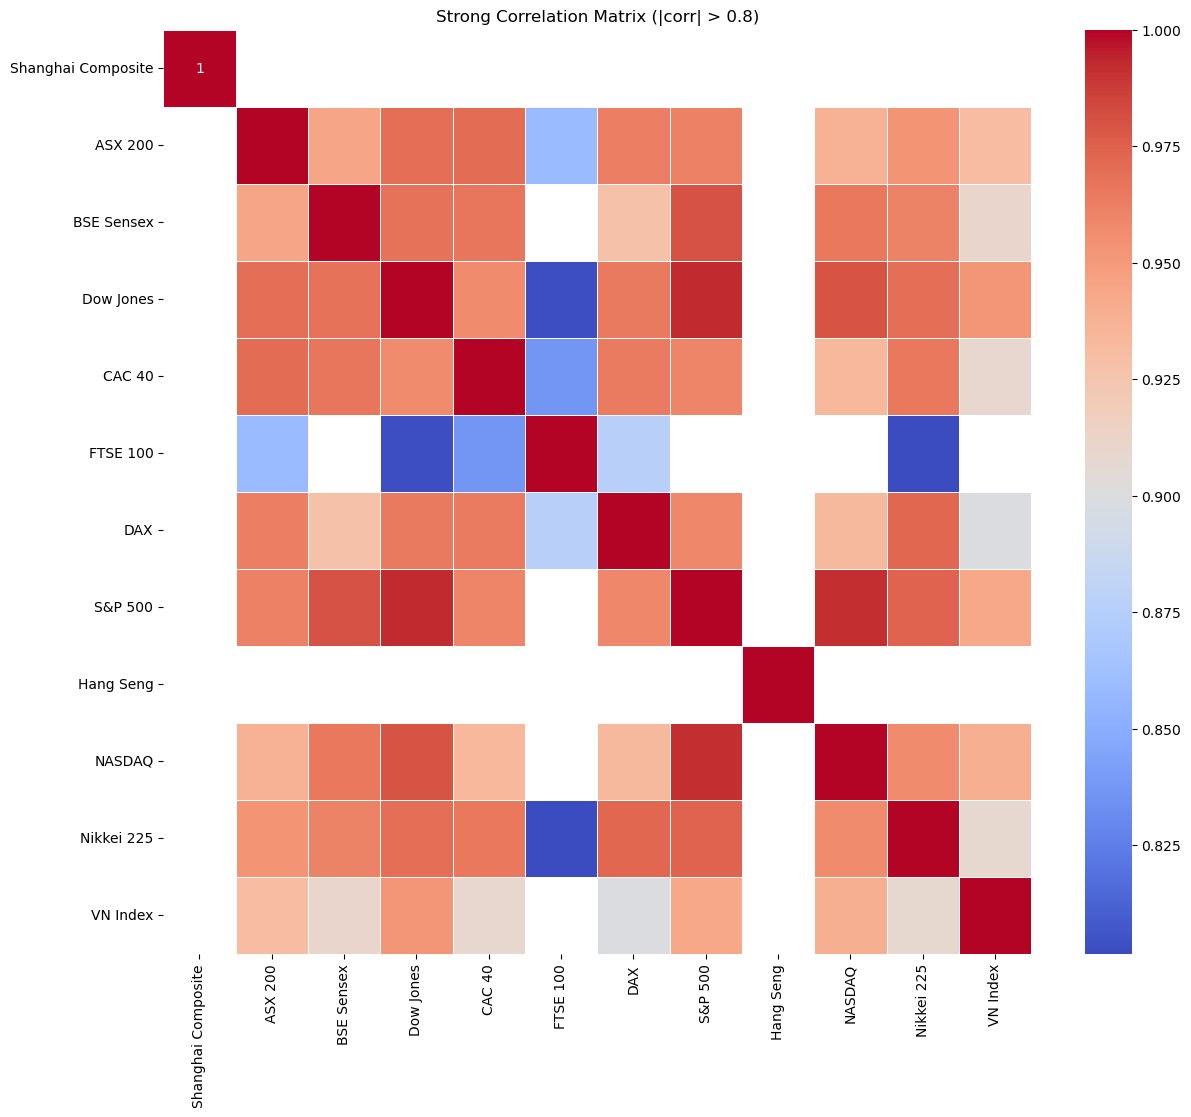

In [531]:
# Chọn các giá trị tương quan mạnh (corr > 0.8 hoặc corr < -0.8)
strong_corr = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

# Plotting the strong correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 10})
plt.title('Strong Correlation Matrix (|corr| > 0.8)')
plt.show()